In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import numpy as np

In [3]:
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'], dayfirst=True)
df.rename(columns={'Dates': 'ds', 'Prices': 'y'}, inplace=True)

df.head()


,ds,y
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


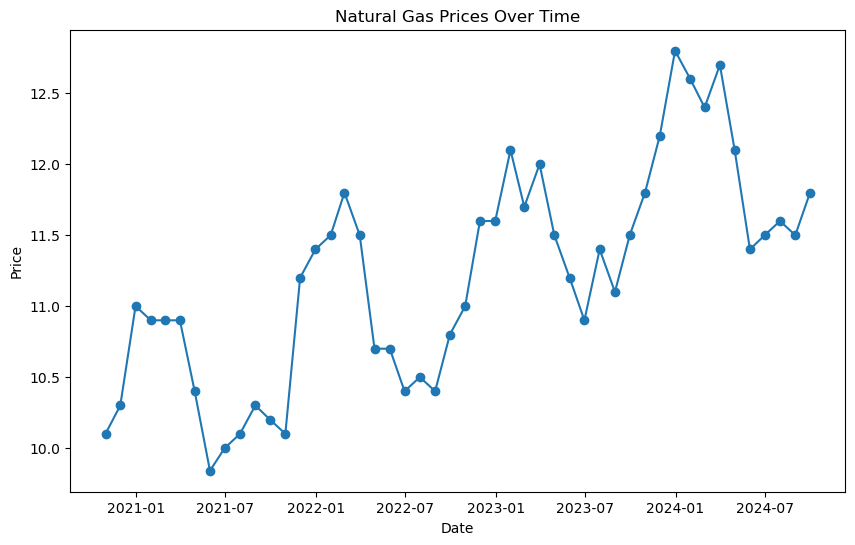

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

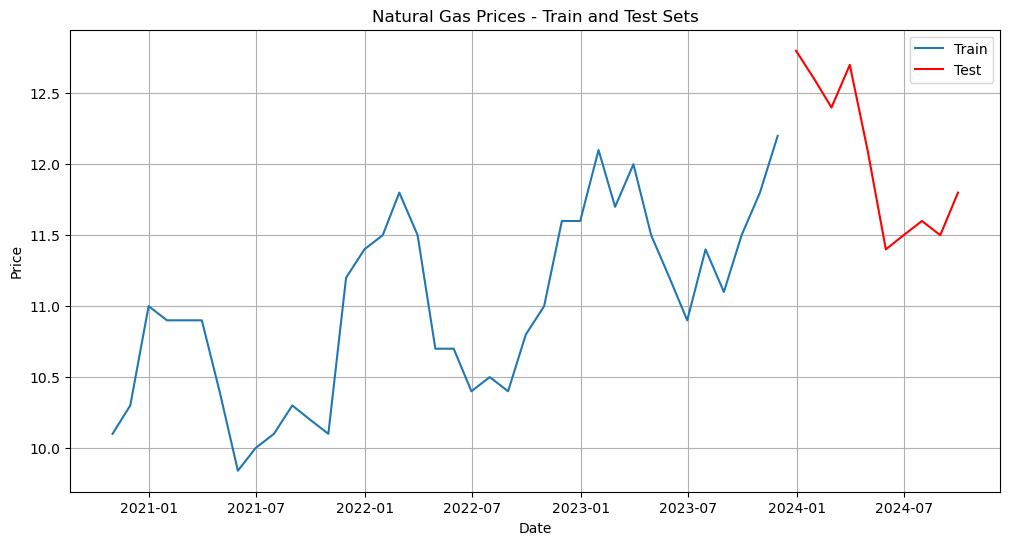

In [5]:
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='red')
plt.title('Natural Gas Prices - Train and Test Sets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

14:32:01 - cmdstanpy - INFO - Chain [1] start processing
14:32:01 - cmdstanpy - INFO - Chain [1] done processing


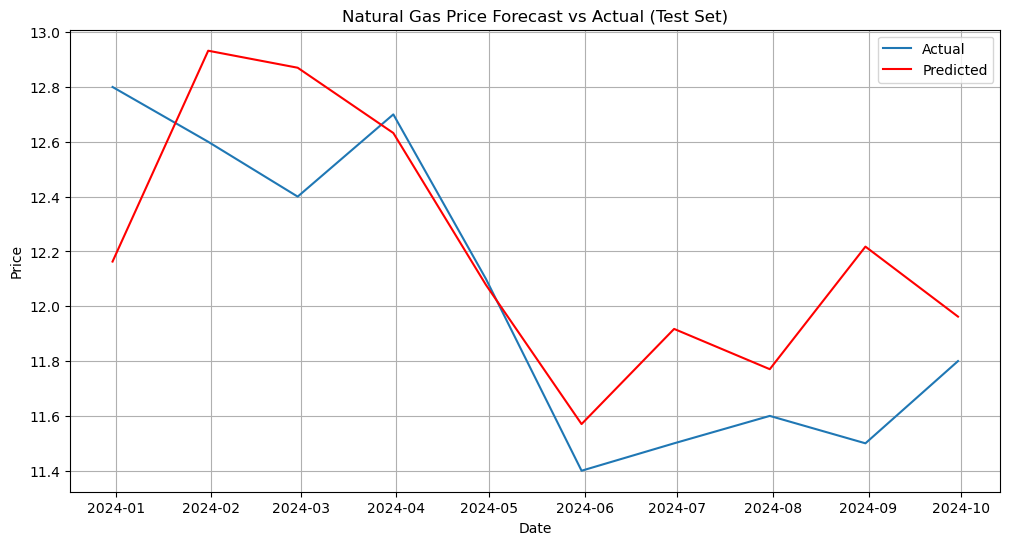

In [6]:
#Train the model using Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(train_df)

#Predict the prices for the test set
future_test = model.make_future_dataframe(periods=len(test_df), freq='M', include_history=False)
forecast_test = model.predict(future_test)

# Visualize the forecast on the test set
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='red')
plt.title('Natural Gas Price Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
print(f"Mean Absolute Error (MAE) on the test set: {mae:.2f}")

def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure that y_true does not contain zeros to avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df['y'], forecast_test['yhat'])
print(f"Mean Absolute Percentage Error (MAPE) on the test set: {mape:.2f}%") ##Our MAPE is small so a good model for Natural Gas

Mean Absolute Error (MAE) on the test set: 0.32
Mean Absolute Percentage Error (MAPE) on the test set: 2.63%


14:32:02 - cmdstanpy - INFO - Chain [1] start processing
14:32:02 - cmdstanpy - INFO - Chain [1] done processing


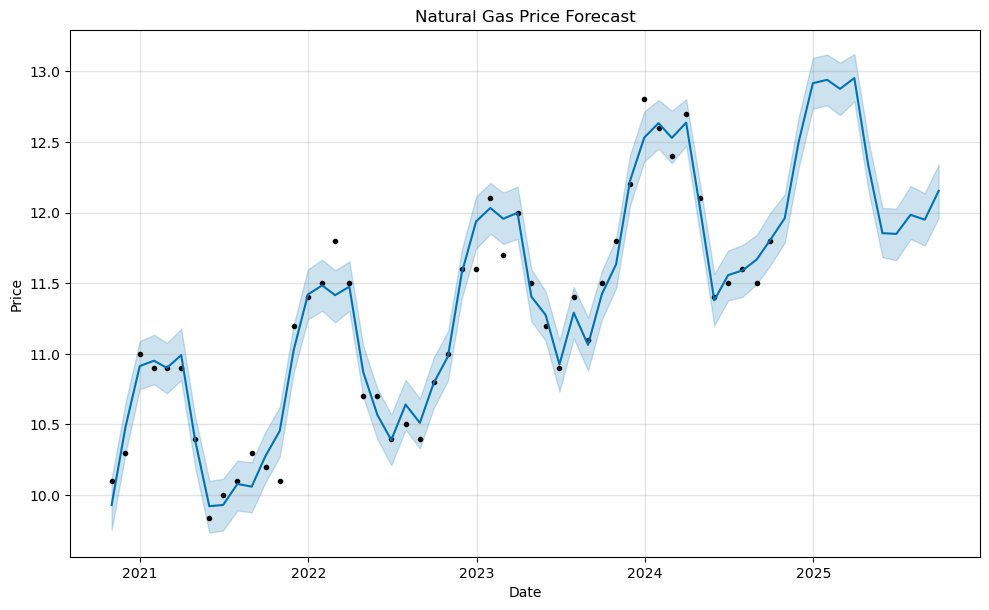

In [8]:
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


fig = model.plot(forecast)
plt.title('Natural Gas Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



In [14]:
def estimate_price(date_str):
    # Convert string date to datetime
    date = pd.to_datetime(date_str, dayfirst=True)
    # Create a dataframe for the input date
    future_date_df = pd.DataFrame({'ds': [date]})
    # Predict the price
    forecast_date = model.predict(future_date_df)
    return forecast_date['yhat'].values[0]

date_to_estimate = '15/06/2023'
estimated_price = estimate_price(date_to_estimate)
print(f"Estimated price on {date_to_estimate}: {estimated_price:.2f}")

# Save forecasted data
forecast.to_csv('forecasted_natural_gas_prices.csv', index=False)

Estimated price on 15/06/2023: 7.19
